In [31]:
import warnings
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
from plotly.subplots import make_subplots
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [16]:
df = pd.read_csv(r"C:\Users\User\Desktop\Bootfile\softwarecompany.csv", on_bad_lines='skip')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Latitude,Longitude
0,1/27/2020 22:59:06,Google,L6,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,Distributed Systems (Back-End),210000.0,...,0,1,0,0,0,0,Asian,PhD,32.601011,-86.680736
1,7/3/2020 19:56:38,Microsoft,61,Software Engineer,136000,"Redmond, WA",3.0,2.0,DevOps,124000.0,...,0,0,0,1,0,0,Two Or More,Bachelor's Degree,61.302501,-158.775020
2,7/3/2020 20:03:57,Google,L5,Software Engineer,337000,"San Bruno, CA",6.0,6.0,Full Stack,177000.0,...,0,1,0,0,0,0,Asian,Bachelor's Degree,34.168219,-111.930907
3,7/3/2020 20:05:37,Microsoft,62,Software Engineer,222000,"Seattle, WA",4.0,4.0,API Development (Back-End),164000.0,...,0,1,0,0,0,0,Asian,Master's Degree,34.751928,-92.131378
4,7/3/2020 20:19:06,Blend,IC3,Software Engineer,187000,"San Francisco, CA",5.0,0.0,Full Stack,165000.0,...,0,0,1,0,0,0,White,Bachelor's Degree,37.271875,-119.270415


In [17]:
# Check work
assert df.shape[0] == 21521, f"`df` should have 70,836 rows, not {df.shape[0]}."
assert df.shape[1] == 31, f"`df` should have 12 columns, not {df.shape[1]}."

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21521 entries, 0 to 21520
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                21521 non-null  object 
 1   company                  21521 non-null  object 
 2   level                    21521 non-null  object 
 3   title                    21521 non-null  object 
 4   totalyearlycompensation  21521 non-null  int64  
 5   location                 21521 non-null  object 
 6   yearsofexperience        21521 non-null  float64
 7   yearsatcompany           21521 non-null  float64
 8   tag                      21521 non-null  object 
 9   basesalary               21521 non-null  float64
 10  stockgrantvalue          21521 non-null  float64
 11  bonus                    21521 non-null  float64
 12  gender                   21521 non-null  object 
 13  otherdetails             21521 non-null  object 
 14  cityid                

In [19]:
nans =  pd.Series(df.isna().sum())
print("nans shape:", nans.shape)
nans.head()

nans shape: (31,)


timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
dtype: int64

In [20]:
df.shape

(21521, 31)

In [21]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Latitude,Longitude
count,2.152100e+04,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,...,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,51.000000,51.000000
mean,1.979472e+05,7.126899,2.706566,133897.077273,44969.985270,18399.749082,10178.295200,561.286046,59204.709400,0.421031,...,0.042842,0.013940,0.015752,0.528832,0.355606,0.035454,0.030761,0.049394,39.309525,-92.799191
std,1.331233e+05,5.849500,3.328219,57229.207611,72517.216239,24800.958541,7679.321521,315.717158,14562.333159,0.493736,...,0.202505,0.117244,0.124518,0.499180,0.478708,0.184928,0.172673,0.216693,6.076229,19.363620
min,1.000000e+04,0.000000,0.000000,4000.000000,0.000000,0.000000,10.000000,0.000000,21208.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.460000,-158.775020
25%,1.190000e+05,3.000000,0.000000,100000.000000,0.000000,3000.000000,7322.000000,501.000000,47068.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.570143,-100.274715
50%,1.740000e+05,6.000000,2.000000,135000.000000,20000.000000,13000.000000,8198.000000,751.000000,59848.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.145251,-89.504139
75%,2.450000e+05,10.000000,4.000000,165000.000000,55000.000000,25000.000000,11521.000000,807.000000,71594.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,42.531632,-78.531742
max,4.980000e+06,45.000000,40.000000,900000.000000,954000.000000,900000.000000,47926.000000,881.000000,83875.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,61.302501,-69.014866


In [22]:
df[["title","company", "tag"]].nunique()

title        15
company    1244
tag        1542
dtype: int64

In [23]:
df[["basesalary","yearsatcompany", "yearsofexperience", "totalyearlycompensation"]].value_counts().index.values

array([(116000.0, 0.0, 0.0, 150000), (100000.0, 0.0, 0.0, 110000),
       (80000.0, 1.0, 1.0, 80000), ..., (119000.0, 4.0, 4.0, 140000),
       (119000.0, 3.0, 11.0, 125000), (900000.0, 4.0, 22.0, 900000)],
      dtype=object)

In [25]:
df["basesalary"].unique()

array([210000., 124000., 177000., 164000., 165000., 160000., 103000.,
        78000., 130000., 140000., 150000.,  45000., 112000., 114000.,
       167000., 155000., 187000., 110000., 153000., 111000., 215000.,
       201000.,  27000., 180000.,  36000.,  53000., 170000., 250000.,
       126000., 246000., 220000., 135000.,  74000., 120000.,  90000.,
        66000., 127000.,  70000., 185000., 198000., 163000., 191000.,
        40000., 107000., 142000.,  86000., 134000., 192000.,  95000.,
       117000., 194000., 183000., 137000., 147000., 145000., 123000.,
       159000., 171000.,  73000., 178000., 228000., 148000., 280000.,
       144000.,  99000.,  47000., 105000., 115000.,  17000., 129000.,
        67000.,  92000.,  55000.,  83000., 270000., 121000.,  85000.,
       175000., 152000.,  84000., 200000., 119000.,  65000., 225000.,
       207000., 128000., 151000.,  77000., 106000., 143000., 182000.,
        54000., 195000.,  38000.,  23000., 122000., 100000., 162000.,
       174000., 1560

In [24]:
np.unique(df[["basesalary","yearsatcompany", "yearsofexperience", "totalyearlycompensation"]])

array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
       6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01,
       1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.700e+01,
       1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01, 2.300e+01,
       2.400e+01, 2.500e+01, 2.600e+01, 2.700e+01, 2.800e+01, 2.900e+01,
       3.000e+01, 3.100e+01, 3.200e+01, 3.300e+01, 3.500e+01, 3.600e+01,
       3.700e+01, 3.800e+01, 3.900e+01, 4.000e+01, 4.500e+01, 4.000e+03,
       5.000e+03, 6.000e+03, 7.000e+03, 8.000e+03, 9.000e+03, 1.000e+04,
       1.100e+04, 1.200e+04, 1.300e+04, 1.400e+04, 1.500e+04, 1.600e+04,
       1.700e+04, 1.800e+04, 1.900e+04, 2.000e+04, 2.100e+04, 2.200e+04,
       2.300e+04, 2.400e+04, 2.500e+04, 2.600e+04, 2.700e+04, 2.800e+04,
       2.900e+04, 3.000e+04, 3.100e+04, 3.200e+04, 3.300e+04, 3.400e+04,
       3.500e+04, 3.600e+04, 3.700e+04, 3.800e+04, 3.900e+04, 4.000e+04,
       4.100e+04, 4.200e+04, 4.300e+04, 4.400e+04, 

In [26]:
df1 = df[["title","company", "tag","basesalary","yearsatcompany", "yearsofexperience", "totalyearlycompensation"]]

In [27]:
df1.head()

,title,company,tag,basesalary,yearsatcompany,yearsofexperience,totalyearlycompensation
0,Software Engineer,Google,Distributed Systems (Back-End),210000.0,5.0,5.0,400000
1,Software Engineer,Microsoft,DevOps,124000.0,2.0,3.0,136000
2,Software Engineer,Google,Full Stack,177000.0,6.0,6.0,337000
3,Software Engineer,Microsoft,API Development (Back-End),164000.0,4.0,4.0,222000
4,Software Engineer,Blend,Full Stack,165000.0,0.0,5.0,187000


In [28]:
df1.select_dtypes("object").nunique()

title        15
company    1244
tag        1542
dtype: int64

In [29]:
df1.select_dtypes("number").head()

,basesalary,yearsatcompany,yearsofexperience,totalyearlycompensation
0,210000.0,5.0,5.0,400000
1,124000.0,2.0,3.0,136000
2,177000.0,6.0,6.0,337000
3,164000.0,4.0,4.0,222000
4,165000.0,0.0,5.0,187000


In [30]:
df1.select_dtypes("number").corr()

,basesalary,yearsatcompany,yearsofexperience,totalyearlycompensation
basesalary,1.000000,0.182941,0.421357,0.784558
yearsatcompany,0.182941,1.000000,0.537457,0.167440
yearsofexperience,0.421357,0.537457,1.000000,0.402809
totalyearlycompensation,0.784558,0.167440,0.402809,1.000000


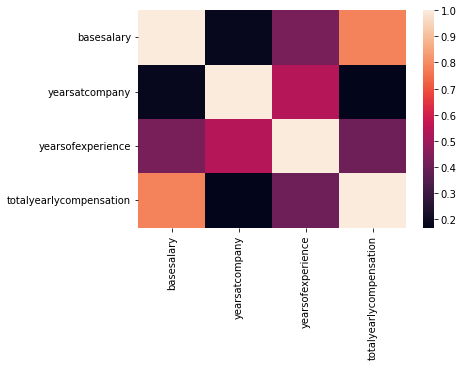

In [33]:
corr = df1.select_dtypes("number").corr()
sns.heatmap(corr);

# Split data

In [34]:
features = ["title","company", "tag"]
X = df[features]
print(X.shape)
X.head()

(21521, 3)


,title,company,tag
0,Software Engineer,Google,Distributed Systems (Back-End)
1,Software Engineer,Microsoft,DevOps
2,Software Engineer,Google,Full Stack
3,Software Engineer,Microsoft,API Development (Back-End)
4,Software Engineer,Blend,Full Stack


In [35]:
assert X.shape == (21521, 3), f"`X_train` is the wrong size: {X_train.shape}."

In [40]:
target ="basesalary"
y = df[target]
print(y.shape)
y.head()

(21521,)


0    210000.0
1    124000.0
2    177000.0
3    164000.0
4    165000.0
Name: basesalary, dtype: float64

In [41]:
assert y.shape == (21521,), f"`y_train` is the wrong size: {y.shape}."

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17216, 3)
y_train shape: (17216,)
X_test shape: (4305, 3)
y_test shape: (4305,)


In [43]:
# Check your work
assert X_train.shape == (
    17216,
    3,
), f"The shape of `X_train` should be ( 17216, 3), not {X_train.shape}."
assert y_train.shape == (
   17216,
), f"The shape of `y_train` should be (17216,), not {y_train.shape}."
assert X_test.shape == (
    4305,
    3,
), f"The shape of `X_test` should be (4305, 11), not {X_test.shape}."
assert y_test.shape == (
    4305,
), f"The shape of `y_test` should be (4305,), not {y_test.shape}."

In [49]:
X_train, X_val, y_train, y_val = train_test_split( 
    X_train, y_train, test_size=0.2, random_state = 42
)

# Build Model

# Baseline

In [44]:
#Calculate the baseline accuracy score for your model
acc_baseline = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.04


In [45]:
# Build Model
model = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(max_depth = 6, random_state = 42)
)
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['title', 'company', 'tag'],
                                mapping=[{'col': 'title',
                                          'data_type': dtype('O'),
                                          'mapping': Software Engineer                1
Solution Architect               2
Hardware Engineer                3
Business Analyst                 4
Software Engineering Manager     5
Sales                            6
Marketing                        7
Product Designer                 8
Mechanical Engineer              9
Data Scientist                  10
Product Manager                 11
Recruiter                       12
Human Resources                 13
Managemen...
Length: 1184, dtype: int64},
                                         {'col': 'tag', 'data_type': dtype('O'),
                                          'mapping': Distributed Systems (Back-End)       1
Full Stack                           2
DevOps      

In [47]:
# Check your work
check_is_fitted(model[-1])

In [50]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = model.score(X_val, y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 0.05
Validation Accuracy: 0.06


In [51]:
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 6


In [52]:
depth_hyperparams = range(1,50,2)
depth_hyperparams

range(1, 50, 2)

In [54]:
# Check  work
assert (
    len(list(depth_hyperparams)) == 25
), f"`depth_hyperparams` should contain 25 items, not {len(list(depth_hyperparams))}."
assert (
    list(depth_hyperparams)[0] == 1
), f"`depth_hyperparams` should begin at 1, not {list(depth_hyperparams)[0]}."
assert (
    list(depth_hyperparams)[-1] == 49
), f"`depth_hyperparams` should end at 49, not {list(depth_hyperparams)[-1]}."

In [55]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model =  make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(max_depth = d, random_state = 42)
)
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val, y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.042477490560557656, 0.04494626778971827, 0.05424048794655823]
Validation Accuracy Scores: [0.040360046457607435, 0.04123112659698026, 0.041811846689895474]


In [56]:
# Check  work
assert (
    len(training_acc) == 25
), f"`training_acc` should contain 25 items, not {len(training_acc)}."
assert (
    len(validation_acc) == 25
), f"`validation_acc` should contain 25 items, not {len(validation_acc)}."

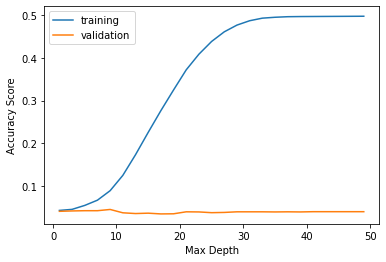

In [57]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label="training")
plt.plot(depth_hyperparams, validation_acc, label = "validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();

# Evaluate

In [58]:
test_acc = model.score(X_test, y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.04


# Communicate

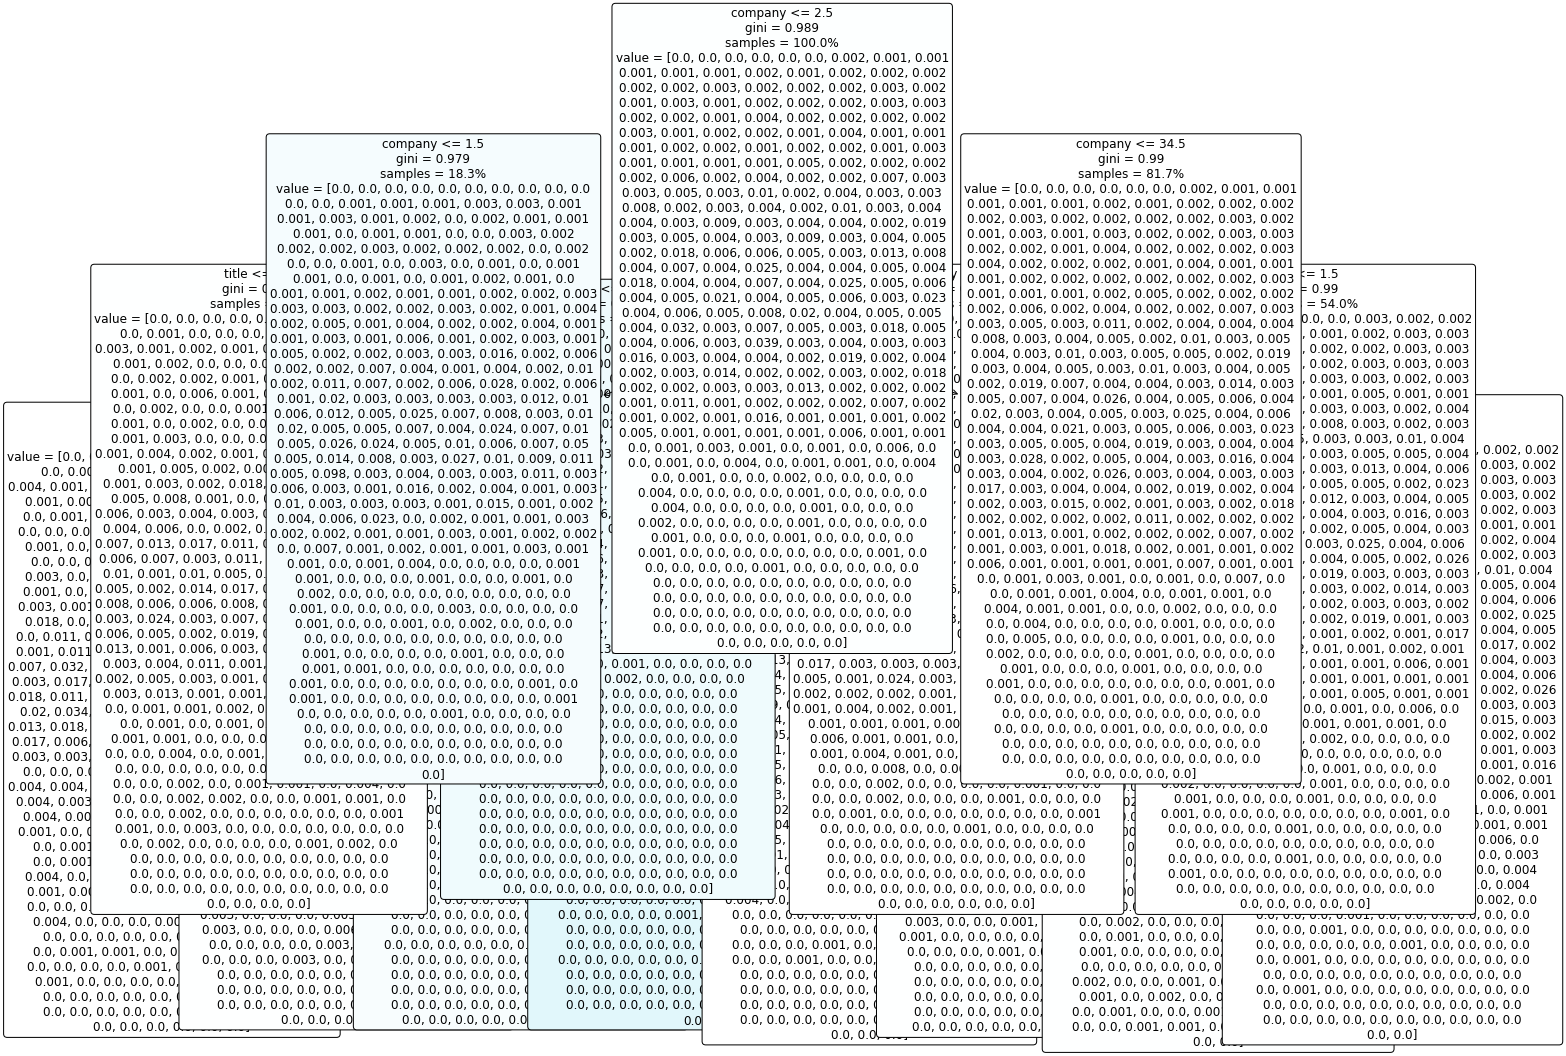

In [59]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree= model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [60]:
#  To Assign the feature names and importances of the model to the variables
features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['title', 'company', 'tag'], dtype='object')
Importances: [0.31018146 0.51276871 0.17704983]


In [61]:
len(features)

3

In [62]:
len(importances)

3

In [66]:
# Check your work
assert len(features) == 3, f"`features` should contain 3 items, not {len(features)}."
assert (
    len(importances) == 3
), f"`importances` should contain 3 items, not {len(importances)}."

In [67]:
feat_imp =  pd.Series(importances, index= features).sort_values()
feat_imp.head()

tag        0.177050
title      0.310181
company    0.512769
dtype: float64

In [68]:
# Check your work
assert isinstance(
    feat_imp, pd.Series
), f"`feat_imp` should be a Series, not {type(feat_imp)}."
assert feat_imp.shape == (
    3,
), f"`feat_imp` should have shape (3,), not {feat_imp.shape}."

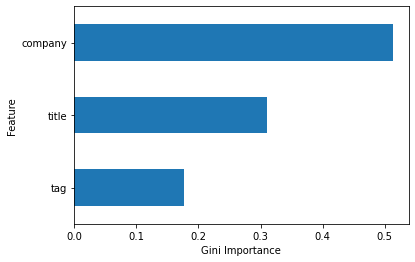

In [69]:
# Create horizontal bar chart
feat_imp.plot(kind= "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature");   